In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
df.shape

(5572, 2)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [51]:
value_counts = df['v1'].value_counts()

# Create a Plotly bar plot
fig = px.bar(
    x=value_counts.index,
    y=value_counts.values,
    labels={'x': 'v1 Type', 'y': 'Count'},
    title='Bar Plot of v1 Value Counts'
)

# Show the plot
fig.show()


In [52]:
# find duplicate
print(df.duplicated().sum())
# show duplicates example
df[df.duplicated()]

403


,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [53]:
# missing values
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [54]:
# pie chart for duplicate values and replace labels true and false with dupel and single
duplicates = df.duplicated().replace({True: 'duplicate', False: 'single'}).value_counts()

# Create a pie chart with Plotly
fig = px.pie(
    names=duplicates.index,
    values=duplicates.values,
    title='Duplicate vs Single Entries',
    labels={'names': 'Entry Type', 'values': 'Count'},
    hole=0.4  # Optional: Adds a donut-style hole in the center
)

# Show the plot
fig.show()



In [55]:
# remove duplicate
df.drop_duplicates(inplace=True)

In [56]:
df.duplicated().sum()

0

In [57]:
df.shape

(5169, 2)

In [58]:
# encoder v1
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
df['v1'].value_counts()

v1
0    4516
1     653
Name: count, dtype: int64

In [60]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
# column with len of text
df['char_count'] = df['v2'].apply(len)
#column with len of words
df['word_count'] = df['v2'].apply(lambda x: len(nltk.word_tokenize(x)))
# column with len of sentences
df['num_sentences'] = df['v2'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [62]:
df.head()

,v1,v2,char_count,word_count,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [63]:
df[['char_count','num_sentences','word_count']].describe()

,char_count,num_sentences,word_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,18.455794
std,58.236293,1.448541,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,38.000000,220.000000


In [64]:
df[df['v1']== 0][['char_count','num_sentences','word_count']].describe()

,char_count,num_sentences,word_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,17.123782
std,56.358207,1.383657,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,38.000000,220.000000


In [65]:
df[df['v1']== 1][['char_count','num_sentences','word_count']].describe()

,char_count,num_sentences,word_count
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,27.667688
std,30.137753,1.488425,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,9.000000,46.000000


<Axes: >

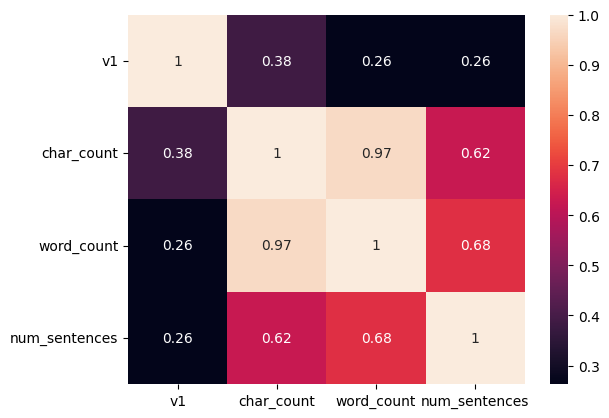

In [66]:
numerical_df = df.select_dtypes(include=['number'])

# Now create the heatmap with the numerical data
sns.heatmap(numerical_df.corr(), annot=True)

In [67]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=df[df['v1'] == 0]['char_count'],
        name='Ham (target=0)',
        marker_color='blue',
        opacity=0.6
    )
)

fig.add_trace(
    go.Histogram(
        x=df[df['v1'] == 1]['char_count'],
        name='Spam (target=1)',
        marker_color='red',
        opacity=0.6
    )
)

# Overlay both histograms
fig.update_layout(
    title='Distribution of Character Count by Target',
    xaxis_title='Number of Characters',
    yaxis_title='Count',
    barmode='overlay',  # Overlay both histograms
    bargap=0.1,
    width=900,
    height=500,
)

# Adjust transparency for better visualization
fig.update_traces(opacity=0.75)

# Show the plot
fig.show()


In [93]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=df[df['v1'] == 0]['num_sentences'],
        name='Ham (target=0)',
        marker_color='blue',
        opacity=0.6
    )
)

fig.add_trace(
    go.Histogram(
        x=df[df['v1'] == 1]['num_sentences'],
        name='Spam (target=1)',
        marker_color='red',
        opacity=0.6
    )
)

# Overlay both histograms
fig.update_layout(
    title='Distribution of num_sentences by Target',
    xaxis_title='Number of Sentences',
    yaxis_title='Count',
    barmode='overlay',  # Overlay both histograms
    bargap=0.1,
    width=900,
    height=500,
)

# Adjust transparency for better visualization
fig.update_traces(opacity=0.75)

fig.update_layout(
    xaxis_range=[1, 38],
    xaxis_dtick=1 
)
# Show the plot
fig.show()


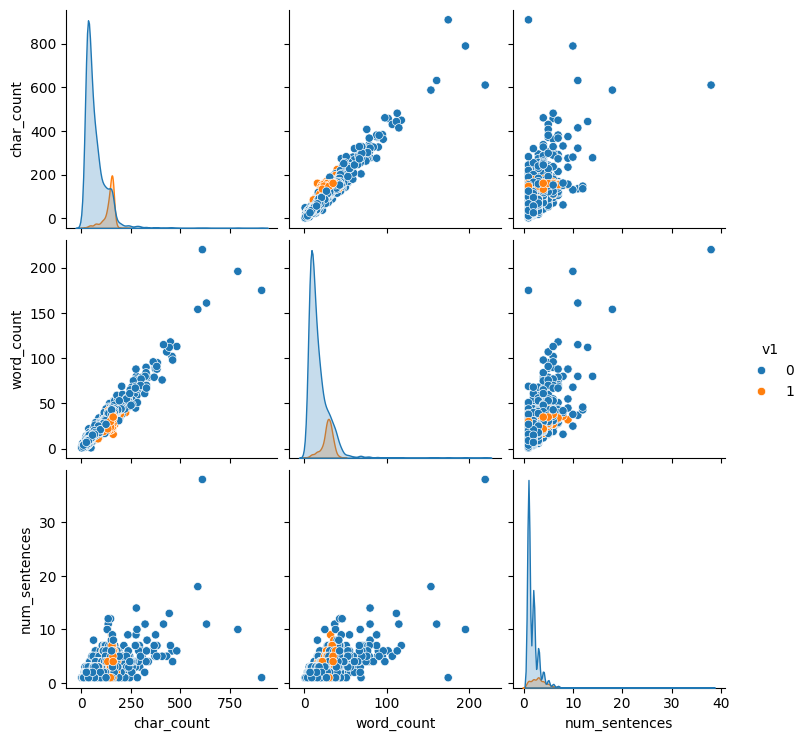

In [69]:
sns.pairplot(df, hue='v1')

# DATA PREPROCESSING


In [70]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.porter import PorterStemmer
import string

In [71]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    ps = PorterStemmer()

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [72]:
df['v2'][500]

'Fighting with the world is easy, u either win or lose bt fightng with some1 who is close to u is dificult if u lose - u lose if u win - u still lose.'

In [73]:
transform_text(df['v2'][500])

'fight world easi u either win lose bt fightng some1 close u dificult u lose u lose u win u still lose'

In [74]:
df['transformed_text'] = df['v2'].apply(transform_text)

In [75]:
df.head()

,v1,v2,char_count,word_count,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [76]:
df.to_csv('modified_spam_data.csv', index=False)

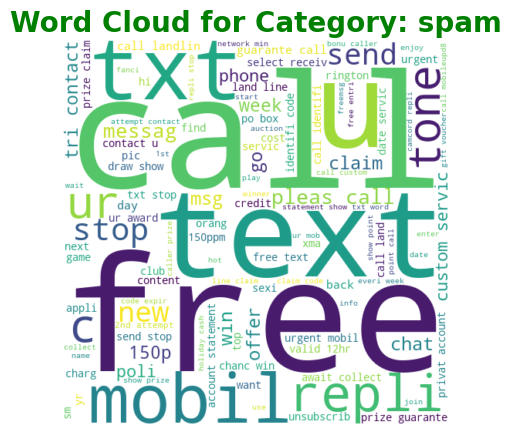

In [77]:
# word cloud for v1=0
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['v1']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear', cmap='viridis')
plt.title(f'Word Cloud for Category: spam', fontsize=20, fontweight='bold', color='green')
plt.axis('off')
plt.show()

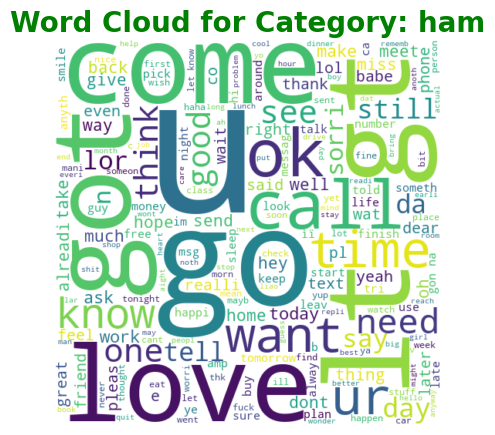

In [78]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['v1']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear', cmap='viridis')
plt.title(f'Word Cloud for Category: ham', fontsize=20, fontweight='bold', color='green')
plt.axis('off')
plt.show()

In [79]:
spam_corpus = []
for msg in df[df['v1'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [80]:
from collections import Counter

most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['spam word', 'count'])
px.bar(most_common_words, x='spam word', y='count', title='Most Common Words in Spam Messages')

In [81]:
ham_corpus = []
for msg in df[df['v1'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [82]:
from collections import Counter

most_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['ham word', 'count'])
px.bar(most_common_words, x='ham word', y='count', title='Most Common Words in ham Messages')

# Machine Learning

In [83]:
df.isnull().sum()

v1                  0
v2                  0
char_count          0
word_count          0
num_sentences       0
transformed_text    0
dtype: int64

In [85]:
df.dropna(subset=['transformed_text'], inplace=True)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [13]:
X.shape

(5160, 3000)

In [14]:
y=df['v1'].values

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# MulinomialNB

### Before cross-validation

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=2)


In [55]:
mnb = MultinomialNB()

In [68]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.78      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



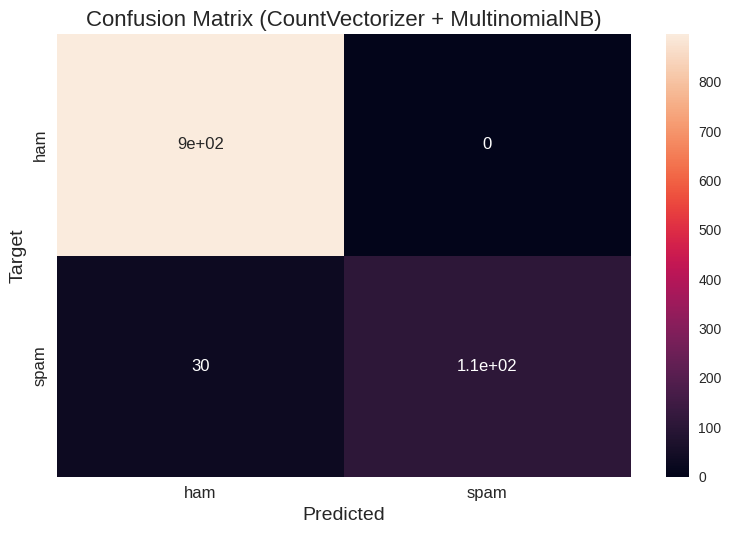

In [69]:
cm = confusion_matrix(y_test,y_pred2)

ax = sns.heatmap(cm,annot=True)
ax.set_title('Confusion Matrix (CountVectorizer + MultinomialNB)',fontsize=16)
ax.xaxis.set_ticklabels(['ham','spam'],fontsize=12)
ax.yaxis.set_ticklabels(['ham','spam'],fontsize=12)
ax.set_xlabel("Predicted",fontsize=14)
ax.set_ylabel("Target",fontsize=14)

plt.tight_layout()

### After Cross-validation

In [20]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

mnb = MultinomialNB()
scores = cross_val_score(mnb, X, y, cv=skf)
print(f"Stratified K-Fold Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.2f}")

Stratified K-Fold Scores: [0.97189922 0.97577519 0.97771318 0.96996124 0.96802326]
Mean Accuracy: 0.97


In [ ]:

df['transformed_text'].fillna("", inplace=True)


Confusion Matrix:
 [[4505    2]
 [  90  563]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4507
        spam       1.00      0.86      0.92       653

    accuracy                           0.98      5160
   macro avg       0.99      0.93      0.96      5160
weighted avg       0.98      0.98      0.98      5160



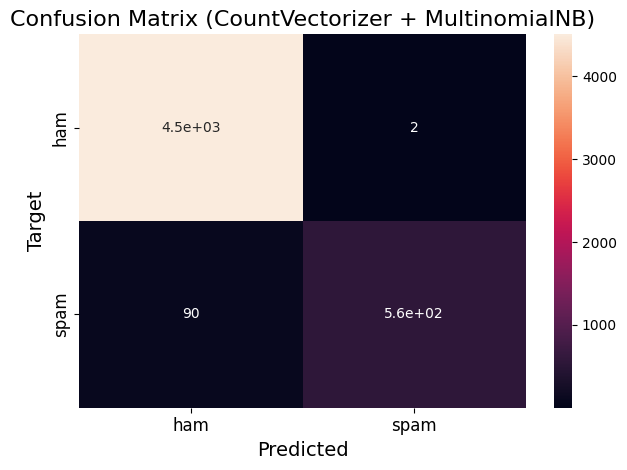

In [22]:

mnb.fit(X, y)
y_pred = mnb.predict(X)

# Generate the confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y, y_pred, target_names=['ham', 'spam'])
print("\nClassification Report:\n", report)
# apply heatmap

import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cm, annot=True)
ax.set_title('Confusion Matrix (CountVectorizer + MultinomialNB)',fontsize=16)

ax.xaxis.set_ticklabels(['ham','spam'],fontsize=12)

ax.yaxis.set_ticklabels(['ham','spam'],fontsize=12)

ax.set_xlabel("Predicted",fontsize=14)

ax.set_ylabel("Target",fontsize=14)

plt.tight_layout()

